In [1]:
from keras.datasets import imdb

Using TensorFlow backend.
/opt/anaconda3/envs/tensorflow_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/tensorflow_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/tensorflow_1/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/tensor

In [3]:
import numpy as np
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

# restore np.load for future normal usage
np.load = np_load_old

/opt/anaconda3/envs/tensorflow_1/lib/python3.6/site-packages/keras/datasets/imdb.py:99: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/anaconda3/envs/tensorflow_1/lib/python3.6/site-packages/keras/datasets/imdb.py:100: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])

9999

In [26]:
word_index=imdb.get_word_index() #word_index는 단어와 정수 인덱스를 매핑한 딕셔너리
reverse_word_index=dict(
    [(value,key) for (key,value) in word_index.items()]) #정수 인덱스와 단어를 매핑하도록 뒤집는다
#print(reverse_word_index)
#review decoding : 0,1,2 는 "패딩","문서시작","사전에 없음" 을 위한 인덱스이므로 3을 뺀다
decoded_review=' '.join(
    [reverse_word_index.get(i -3,'?') for i in train_data[0]]) #딕셔너리 안에 찾으려는 Key 값이 없을 경우 미리 정해 둔 디폴트 값을 대신 가져오게 하고 싶을 때에는 get(x, '디폴트 값')을 사용

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### 데이터 준비(one-hot encoding)

In [33]:
import numpy as np

def vectorize_sequence(sequences, dimension=10000):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1. #result[i]에서 특정 인덱스의 위치를 1로 만든다
    return results

x_train=vectorize_sequence(train_data)
x_test=vectorize_sequence(test_data)

In [48]:
print(train_data[0:2])
print(x_train[0:2])
print(x_train.shape) #(sample수, dim)
#print(len(train_data),len(test_data))

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [46]:
print(type(train_labels),train_labels[0].dtype)
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')
print(type(y_train),y_train[0].dtype)

<class 'numpy.ndarray'> int64
<class 'numpy.ndarray'> float32


In [50]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

'''
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
            loss=losses.binary_crossentropy,
            metrics=[metrics.binary_accuracy])

'''

'\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n            loss=losses.binary_crossentropy,\n            metrics=[metrics.binary_accuracy])\n\n'

### 훈련 검증

In [51]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

print(len(x_val))
print(len(partial_x_train))

10000
15000


In [52]:
history=model.fit(partial_x_train,
                 partial_y_train,
                 epochs=20,
                 batch_size=512,
                 validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 226us/step - loss: 0.5344 - acc: 0.7746 - val_loss: 0.3943 - val_acc: 0.8687
Epoch 2/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.3181 - acc: 0.8973 - val_loss: 0.3277 - val_acc: 0.8713
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2343 - acc: 0.9245 - val_loss: 0.2862 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1844 - acc: 0.9400 - val_loss: 0.2745 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1526 - acc: 0.9509 - val_loss: 0.2996 - val_acc: 0.8806
Epoch 6/20
15000/15000 [==============================] - 3s 180us/step - loss: 0.1225 - acc: 0.9625 - val_loss: 0.2882 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1070 - acc: 0.9658 - val_loss: 0.3037 - 

In [54]:
history_dict=history.history #hitory객체는 훈련하는 동안 발생한 모든 정보를 담고 있는 딕셔너리인 history속성을 가진다
print(history_dict.keys())
print(history_dict)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
{'val_loss': [0.3942609392642975, 0.32765748500823977, 0.2862100536346436, 0.2745134062767029, 0.2996263228416443, 0.28824317240715025, 0.3036959665775299, 0.32285799288749695, 0.3461557357311249, 0.40123311791419985, 0.3947221251487732, 0.4175915694713592, 0.49656978187561035, 0.48644497504234313, 0.575326760005951, 0.5392196941375732, 0.5735575561523437, 0.6013508170127869, 0.6327239768028259, 0.6604351890563965], 'val_acc': [0.8686999995231628, 0.8713000002861023, 0.8881000001907349, 0.8905000001907348, 0.8806, 0.8865000002861023, 0.8846000001907348, 0.8810000001907349, 0.8802000003814697, 0.8717999998092651, 0.8750000001907349, 0.8745000003814697, 0.8689999997138977, 0.8736999997138977, 0.8543000003814697, 0.8694999997138977, 0.8699999995231629, 0.8668999994277954, 0.8664999994277954, 0.8671999994277955], 'loss': [0.5343556838512421, 0.3181161721865336, 0.23429309798081716, 0.18443560558954875, 0.15261755626201629, 0.122479985749721

### 훈련과 검증 손실 그리기

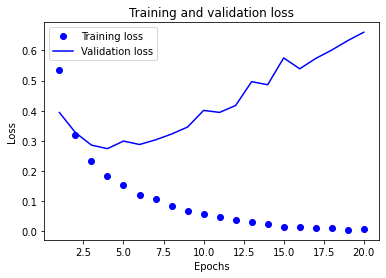

In [55]:
import matplotlib.pyplot as plt

loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

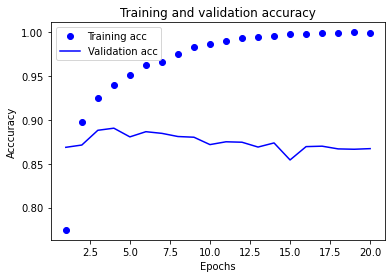

In [56]:
plt.clf() #그래프를 초기화
acc=history_dict['acc']
val_acc=history_dict['val_acc']

plt.plot(epochs, acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acccuracy')
plt.legend()

plt.show()

Epoch 1/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.4584 - acc: 0.8133
Epoch 2/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2630 - acc: 0.9095
Epoch 3/4
25000/25000 [==============================] - 3s 128us/step - loss: 0.2005 - acc: 0.9282
Epoch 4/4
25000/25000 [==============================] - 7s 286us/step


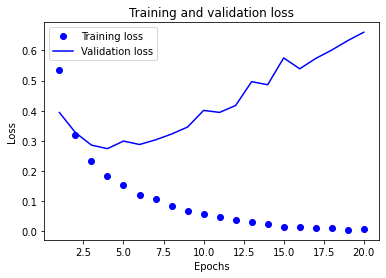

In [61]:
# fit() 메서드를 재호출하면 학습된 가중치에서 훈련이 이어지므로 처음부터 다시 학습하려면 모델 객체를 새로 만들어야 함
# 모델 처음부터 다시 훈련
model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results=model.evaluate(x_test,y_test)


loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()